In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_ollama import ChatOllama
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

load_dotenv()

True

In [5]:
model_llama = ChatOllama(model="llama3")
model_qween = ChatOllama(model="qwen3:4b")
model_gemma = ChatOllama(model="gemma3")

In [4]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [6]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = model_llama.invoke(prompt).content

    return {'joke': response}

In [7]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = model_gemma.invoke(prompt).content

    return {'explanation': response}

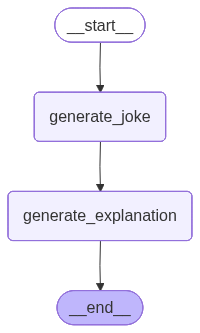

In [9]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)
workflow

In [10]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': 'Why did the pizza go to therapy?\n\nBecause it was feeling crusty and needed to work through some topping issues!',
 'explanation': 'Okay, here\'s an explanation of the joke:\n\nThis is a pun! Here\'s how it works:\n\n* **"Crusty"** – This refers to the actual crust of a pizza, but it\'s also a word often used to describe a grumpy or irritable person.\n* **"Topping Issues"** – This plays on the idea of pizza toppings (pepperoni, mushrooms, etc.) but also subtly suggests emotional issues or problems someone might be struggling with.\n\n**The joke relies on the double meaning of "crusty" and "topping issues" to create a silly and unexpected connection.** It’s funny because it anthropomorphizes a pizza and gives it relatable emotional problems! \n\n---\n\nWould you like to try to create another pun joke explanation?'}

In [11]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to therapy?\n\nBecause it was feeling crusty and needed to work through some topping issues!', 'explanation': 'Okay, here\'s an explanation of the joke:\n\nThis is a pun! Here\'s how it works:\n\n* **"Crusty"** – This refers to the actual crust of a pizza, but it\'s also a word often used to describe a grumpy or irritable person.\n* **"Topping Issues"** – This plays on the idea of pizza toppings (pepperoni, mushrooms, etc.) but also subtly suggests emotional issues or problems someone might be struggling with.\n\n**The joke relies on the double meaning of "crusty" and "topping issues" to create a silly and unexpected connection.** It’s funny because it anthropomorphizes a pizza and gives it relatable emotional problems! \n\n---\n\nWould you like to try to create another pun joke explanation?'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0cde34-040f-6dc4-8002-a10abcf2a

In [12]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to therapy?\n\nBecause it was feeling crusty and needed to work through some topping issues!', 'explanation': 'Okay, here\'s an explanation of the joke:\n\nThis is a pun! Here\'s how it works:\n\n* **"Crusty"** – This refers to the actual crust of a pizza, but it\'s also a word often used to describe a grumpy or irritable person.\n* **"Topping Issues"** – This plays on the idea of pizza toppings (pepperoni, mushrooms, etc.) but also subtly suggests emotional issues or problems someone might be struggling with.\n\n**The joke relies on the double meaning of "crusty" and "topping issues" to create a silly and unexpected connection.** It’s funny because it anthropomorphizes a pizza and gives it relatable emotional problems! \n\n---\n\nWould you like to try to create another pun joke explanation?'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0cde34-040f-6dc4-8002-a10abcf2

In [13]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the spaghetti go to therapy?\n\nBecause it was feeling a little "twisted"! (get it?)',
 'explanation': 'This is a classic pun joke! Here\'s the explanation:\n\n* **Spaghetti** is a long, twisting strand of pasta.\n* **"Twisted"** refers to a feeling of being confused or troubled, but it also literally describes the shape of spaghetti.\n\nThe humor comes from the double meaning of the word "twisted." It plays on the visual image of spaghetti and the word\'s common meaning in psychology. \n\nIt\'s a simple, silly joke that relies on wordplay. 😊'}

In [14]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti go to therapy?\n\nBecause it was feeling a little "twisted"! (get it?)', 'explanation': 'This is a classic pun joke! Here\'s the explanation:\n\n* **Spaghetti** is a long, twisting strand of pasta.\n* **"Twisted"** refers to a feeling of being confused or troubled, but it also literally describes the shape of spaghetti.\n\nThe humor comes from the double meaning of the word "twisted." It plays on the visual image of spaghetti and the word\'s common meaning in psychology. \n\nIt\'s a simple, silly joke that relies on wordplay. 😊'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0cde3e-706e-6ac4-8002-d5e8f6ad60a7'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-30T11:58:36.574558+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0cde3d-bdc0-6332-8001-1fce88f00aba'}}, tasks=(), interrupts=())

In [15]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti go to therapy?\n\nBecause it was feeling a little "twisted"! (get it?)', 'explanation': 'This is a classic pun joke! Here\'s the explanation:\n\n* **Spaghetti** is a long, twisting strand of pasta.\n* **"Twisted"** refers to a feeling of being confused or troubled, but it also literally describes the shape of spaghetti.\n\nThe humor comes from the double meaning of the word "twisted." It plays on the visual image of spaghetti and the word\'s common meaning in psychology. \n\nIt\'s a simple, silly joke that relies on wordplay. 😊'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0cde3e-706e-6ac4-8002-d5e8f6ad60a7'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-30T11:58:36.574558+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0cde3d-bdc0-6332-8001-1fce88f00aba'}}, tasks=(), interrupts=()),
 

### Time Travel

In [26]:
workflow.get_state({"configurable": {"thread_id": "2", "checkpoint_id": "1f0cde3d-56e6-6fd0-8000-05243515ba5a"}})

StateSnapshot(values={'topic': 'pasta'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_id': '1f0cde3d-56e6-6fd0-8000-05243515ba5a'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-11-30T11:58:07.053998+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0cde3d-56ce-6728-bfff-1db3c4671abd'}}, tasks=(PregelTask(id='7f76b76c-c133-e393-62b3-49c85c227a7b', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why did the spaghetti go to therapy?\n\nBecause it was feeling a little "twisted"! (get it?)'}),), interrupts=())

In [27]:
workflow.invoke(None, {"configurable": {"thread_id": "2", "checkpoint_id": "1f0cde3d-56e6-6fd0-8000-05243515ba5a"}})

{'topic': 'pasta',
 'joke': 'Why did the spaghetti go to therapy?\n\nBecause it was feeling a little "twisted"!',
 'explanation': 'Okay, here\'s an explanation of the joke:\n\nThe joke relies on a **pun** – a play on words. \n\n* **"Twisted"** has two meanings:\n    * **Literally:**  Spaghetti can be tangled and knotted, appearing "twisted."\n    * **Figuratively:** "Twisted" also means feeling confused, upset, or troubled – like someone who needs therapy.\n\nThe humor comes from the unexpected connection between the physical appearance of spaghetti and the emotional state it\'s described as experiencing. \n\n---\n\nWould you like to try another joke explanation?'}

In [28]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti go to therapy?\n\nBecause it was feeling a little "twisted"!', 'explanation': 'Okay, here\'s an explanation of the joke:\n\nThe joke relies on a **pun** – a play on words. \n\n* **"Twisted"** has two meanings:\n    * **Literally:**  Spaghetti can be tangled and knotted, appearing "twisted."\n    * **Figuratively:** "Twisted" also means feeling confused, upset, or troubled – like someone who needs therapy.\n\nThe humor comes from the unexpected connection between the physical appearance of spaghetti and the emotional state it\'s described as experiencing. \n\n---\n\nWould you like to try another joke explanation?'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0cdec5-0f34-65d8-8002-0477ec8615b6'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-30T12:58:50.258145+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 

### Updating State

In [29]:
workflow.update_state({"configurable": {"thread_id": "2", "checkpoint_id": "1f0cde3d-56e6-6fd0-8000-05243515ba5a", "checkpoint_ns": ""}}, {'topic':'samosa'})

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0cdeca-7368-6fae-8001-1db227ae8711'}}

In [30]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0cdeca-7368-6fae-8001-1db227ae8711'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-11-30T13:01:14.983191+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0cde3d-56e6-6fd0-8000-05243515ba5a'}}, tasks=(PregelTask(id='8570a471-fdde-41a5-aeae-2196f6419bf6', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti go to therapy?\n\nBecause it was feeling a little "twisted"!', 'explanation': 'Okay, here\'s an explanation of the joke:\n\nThe joke relies on a **pun** – a play on words. \n\n* **"Twisted"** has two meanings:\n    * **Literally:**  Spaghetti can be tangled and knotted, appearing "twisted."\n    * **Figurat

In [31]:
workflow.invoke(None, {"configurable": {"thread_id": "2", "checkpoint_id": "1f0cdeca-7368-6fae-8001-1db227ae8711"}})

{'topic': 'samosa',
 'joke': 'A joke about samosas! Here\'s one:\n\nWhy did the samosa go to therapy?\n\nBecause it was feeling all "filled" with anxiety and didn\'t know how to "unwind"!\n\nHope that brings a smile to your face!',
 'explanation': 'Okay, here’s an explanation of the samosa joke:\n\nThe joke relies on a clever double meaning of the word “filled.”\n\n* **Literal Meaning:** Samosas are, of course, filled with delicious things like potatoes, peas, and spices.\n* **Figurative Meaning:** "Filled" can also mean feeling overwhelmed with worry or anxiety.\n\nThe joke plays on this double meaning. The samosa is “filled” with anxiety *because* it’s filled with food! It\'s a silly, lighthearted play on words.\n\n---\n\nDo you want me to explain another joke, or perhaps break down a different element of this one?'}

In [33]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'samosa', 'joke': 'A joke about samosas! Here\'s one:\n\nWhy did the samosa go to therapy?\n\nBecause it was feeling all "filled" with anxiety and didn\'t know how to "unwind"!\n\nHope that brings a smile to your face!', 'explanation': 'Okay, here’s an explanation of the samosa joke:\n\nThe joke relies on a clever double meaning of the word “filled.”\n\n* **Literal Meaning:** Samosas are, of course, filled with delicious things like potatoes, peas, and spices.\n* **Figurative Meaning:** "Filled" can also mean feeling overwhelmed with worry or anxiety.\n\nThe joke plays on this double meaning. The samosa is “filled” with anxiety *because* it’s filled with food! It\'s a silly, lighthearted play on words.\n\n---\n\nDo you want me to explain another joke, or perhaps break down a different element of this one?'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0cded1-73cd-6e84-8003-293efbefc9df'}}, metadata={'sourc

### Fault Tolerance

In [16]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [17]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [18]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(1000)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

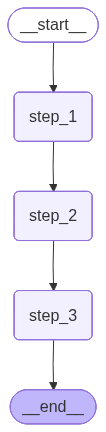

In [19]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)
graph

In [20]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
❌ Kernel manually interrupted (crash simulated).


In [22]:
graph.get_state({"configurable": {"thread_id": 'thread-1'}})

StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0cde43-7005-6fce-8001-3c4e6758ab85'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-11-30T12:00:50.749421+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0cde43-6fff-60ca-8000-55a2eb19df57'}}, tasks=(PregelTask(id='7a1151a7-f40e-e4fc-ba44-b0421eaf3a72', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [23]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0cde43-7005-6fce-8001-3c4e6758ab85'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-11-30T12:00:50.749421+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0cde43-6fff-60ca-8000-55a2eb19df57'}}, tasks=(PregelTask(id='7a1151a7-f40e-e4fc-ba44-b0421eaf3a72', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step_1',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0cde43-6fff-60ca-8000-55a2eb19df57'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-11-30T12:00:50.746581+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'ch

In [24]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)


🔁 Re-running the graph to demonstrate fault tolerance...
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)


KeyboardInterrupt: 

In [ ]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))